In [1]:
!pip install yfinance
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
pip install cvxpy

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.10.1 requires ruamel-yaml, which is not installed.



  Attempting uninstall: setuptools
    Found existing installation: setuptools 58.0.4
    Uninstalling setuptools-58.0.4:
      Successfully uninstalled setuptools-58.0.4


In [2]:
N_PORTFOLIOS = 10 ** 5
N_DAYS = 252
RISKY_ASSETS = ['AAPL', 'IBM', 'MSFT']
RISKY_ASSETS.sort()
START_DATE = '2018-01-01'
END_DATE = '2018-12-31'
n_assets = len(RISKY_ASSETS)

In [3]:
prices_df = yf.download(RISKY_ASSETS, start=START_DATE,
 end=END_DATE)


[*********************100%***********************]  3 of 3 completed


In [4]:
prices_df

Adj Close                             Close              \
                 AAPL         IBM       MSFT       AAPL         IBM   
Date                                                                  
2018-01-02  40.831577  113.086723  80.562035  43.064999  147.466537   
2018-01-03  40.824482  116.195259  80.936981  43.057499  151.520081   
2018-01-04  41.014114  118.548599  81.649345  43.257500  154.588913   
2018-01-05  41.481071  119.127785  82.661629  43.750000  155.344162   
2018-01-08  41.326992  119.846268  82.746002  43.587502  156.281067   
...               ...         ...        ...        ...         ...   
2018-12-21  36.264626   85.013382  93.666161  37.682499  106.061188   
2018-12-24  35.326317   82.430962  89.756630  36.707500  102.839386   
2018-12-26  37.814049   85.358223  95.887886  39.292500  106.491394   
2018-12-27  37.568642   87.189690  96.479095  39.037498  108.776291   
2018-12-28  37.587887   86.614960  95.725800  39.057499  108.059273   

                             High                                Low  \
                  MSFT       AAPL         IBM        MSFT       AAPL   
Date                                                                   
2018-01-02   85.949997  43.075001  148.001907   86.309998  42.314999   
2018-01-03   86.349998  43.637501  152.782028   86.510002  42.990002   
2018-01-04   87.110001  43.367500  155.181641   87.660004  43.020000   
2018-01-05   88.190002  43.842499  155.736145   88.410004  43.262501   
2018-01-08   88.279999  43.902500  156.701721   88.580002  43.482498   
...                ...        ...         ...         ...        ...   
2018-12-21   98.230003  39.540001  110.210327  103.000000  37.407501   
2018-12-24   94.129997  37.887501  106.118546   97.970001  36.647499   
2018-12-26  100.559998  39.307499  106.491394  100.690002  36.680000   
2018-12-27  101.180000  39.192501  108.776291  101.190002  37.517502   
2018-12-28  100.389999  39.630001  109.751434  102.410004  38.637501   

                                        Open                          \
                   IBM       MSFT       AAPL         IBM        MSFT   
Date                                                                   
2018-01-02  146.787766  85.500000  42.540001  147.705551   86.129997   
2018-01-03  149.455063  85.970001  43.132500  150.420654   86.059998   
2018-01-04  152.361374  86.570000  43.134998  152.629059   86.589996   
2018-01-05  154.015289  87.430000  43.360001  155.296371   87.660004   
2018-01-08  154.588913  87.599998  43.587502  155.506699   88.199997   
...                ...        ...        ...         ...         ...   
2018-12-21  105.583176  97.459999  39.215000  107.552582  101.629997   
2018-12-24  102.772469  93.980003  37.037498  105.066925   97.680000   
2018-12-26  101.281075  93.959999  37.075001  103.250481   95.139999   
2018-12-27  104.655830  96.400002  38.959999  105.152962   99.300003   
2018-12-28  107.552582  99.519997  39.375000  109.196938  102.089996   

               Volume                       
                 AAPL       IBM       MSFT  
Date                                        
2018-01-02  102223600   4395815   22483800  
2018-01-03  118071600   9875914   26061400  
2018-01-04   89738400   7903785   21912000  
2018-01-05   94640000   5434807   23407100  
2018-01-08   82271200   5478425   22113000  
...               ...       ...        ...  
2018-12-21  382978400  10864279  111242100  
2018-12-24  148676800   3997184   43935200  
2018-12-26  234330000   6951507   51634800  
2018-12-27  212468400   6323698   49498500  
2018-12-28  169165600   5352905   38196300  

[250 rows x 18 columns]

In [5]:
returns_df = prices_df['Adj Close'].pct_change().dropna()
avg_returns = returns_df.mean() * N_DAYS
cov_mat = returns_df.cov() * N_DAYS
avg_returns = avg_returns.values
cov_mat = cov_mat.values


In [6]:
avg_returns

array([-0.04244784, -0.23902945,  0.21458148])

In [8]:
cov_mat

array([[0.0828502 , 0.03448833, 0.05694837],
       [0.03448833, 0.06097014, 0.0415197 ],
       [0.05694837, 0.0415197 , 0.08039385]])

In [11]:
import cvxpy as cp
weights = cp.Variable(n_assets)
gamma = cp.Parameter(nonneg=True)
portf_rtn_cvx = avg_returns * weights
portf_vol_cvx = cp.quad_form(weights, cov_mat)
objective_function = cp.Maximize(portf_rtn_cvx - gamma *
portf_vol_cvx)
problem = cp.Problem(objective_function,
 [cp.sum(weights) == 1, weights >= 0])


C:\Users\pc\anaconda3\lib\site-packages\cvxpy\expressions\expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 1 times so far.

  warnings.warn(msg, UserWarning)


In [12]:
problem

Problem(Maximize(Expression(CONCAVE, UNKNOWN, (1, 1))), [Equality(Expression(AFFINE, UNKNOWN, ()), Constant(CONSTANT, NONNEGATIVE, ())), Inequality(Constant(CONSTANT, ZERO, ()))])

In [13]:
N_POINTS = 25
portf_rtn_cvx_ef = np.zeros(N_POINTS)
portf_vol_cvx_ef = np.zeros(N_POINTS)
weights_ef = []
gamma_range = np.logspace(-3, 3, num=N_POINTS)
for i in range(N_POINTS):
    gamma.value = gamma_range[i]
    problem.solve()
    portf_vol_cvx_ef[i] = cp.sqrt(portf_vol_cvx).value
    portf_rtn_cvx_ef[i] = portf_rtn_cvx.value
    weights_ef.append(weights.value)


In [14]:
gamma_range

array([1.00000000e-03, 1.77827941e-03, 3.16227766e-03, 5.62341325e-03,
       1.00000000e-02, 1.77827941e-02, 3.16227766e-02, 5.62341325e-02,
       1.00000000e-01, 1.77827941e-01, 3.16227766e-01, 5.62341325e-01,
       1.00000000e+00, 1.77827941e+00, 3.16227766e+00, 5.62341325e+00,
       1.00000000e+01, 1.77827941e+01, 3.16227766e+01, 5.62341325e+01,
       1.00000000e+02, 1.77827941e+02, 3.16227766e+02, 5.62341325e+02,
       1.00000000e+03])

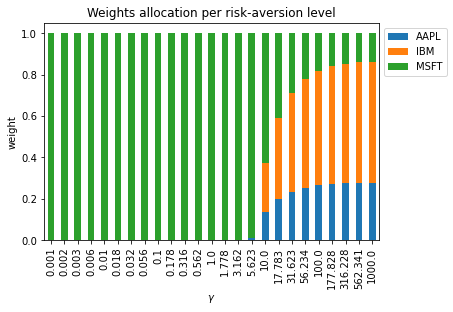

In [15]:
weights_df = pd.DataFrame(weights_ef,
 columns=RISKY_ASSETS,
 index=np.round(gamma_range, 3))
ax = weights_df.plot(kind='bar', stacked=True)
ax.set(title='Weights allocation per risk-aversion level',
 xlabel=r'$\gamma$',
 ylabel='weight')
ax.legend(bbox_to_anchor=(1,1))

In [16]:
weights_df

,AAPL,IBM,MSFT
0.001,-4.093218e-26,-2.221135e-22,1.000000
0.002,3.329943e-22,1.108999e-22,1.000000
0.003,2.221226e-22,2.221700e-22,1.000000
0.006,1.591655e-26,2.220642e-22,1.000000
0.010,2.220728e-22,2.220794e-22,1.000000
0.018,-1.105849e-22,-1.103183e-22,1.000000
0.032,1.117996e-22,-1.097712e-22,1.000000
0.056,-1.108668e-22,-1.108306e-22,1.000000
0.100,-1.151077e-22,-1.179111e-22,1.000000
0.178,4.626844e-25,2.226148e-22,1.000000


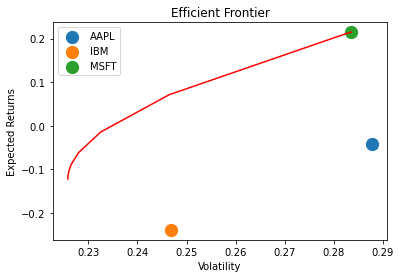

In [27]:
fig, ax = plt.subplots()
ax.plot(portf_vol_cvx_ef, portf_rtn_cvx_ef, 'r-')
for asset_index in range(n_assets):
    plt.scatter(x=np.sqrt(cov_mat[asset_index, asset_index]), y=avg_returns[asset_index], marker='o', label=RISKY_ASSETS[asset_index], s=150)
ax.set(title='Efficient Frontier', xlabel='Volatility', ylabel='Expected Returns')
ax.legend()
